## Import all the necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

## Read the dataset(csv file) and display the first five records.

In [2]:
df = pd.read_csv('E:/major project/ipl2017.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# The dataset consists of 15 columns:
### 1.mid: The match id to uniquely identify each match.
### 2.date: The date on which the match was held.
### 3.venue: The name of the stadium.
### 4.bat_team: The batting team name.
### 5.bowl_team: The bowling team name.
### 6.batsman: The name of the batsman.
### 7.bowler: The name of the bowler.
### 8.runs: The runs scored till now.
### 9.wickets: The wickets taken till now.
### 10.overs: The number of overs bowled.
### 11.runs_last_5: The number of runs scored in last 5 overs.
### 12.wickets_last_5: The number of wickets taken in last 5 overs.
### 13.striker: The name of the batsmen on the batting end.
### 14.non-striker: The name of the batsmen on the bowling end.
### 15.total: The total number of runs scored in the match.


Now exploring the data and decide which columns to ignore.

Divide the data into train set and test set before using a machine learning algorithm.

In [3]:
X = df.iloc[:,[7,8,9,12,13]].values
y = df.iloc[:, 14].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Training the dataset
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=250,max_features=None, random_state = 0)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [6]:
# Testing the dataset on trained model
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)

R square value: 67.54226074950134


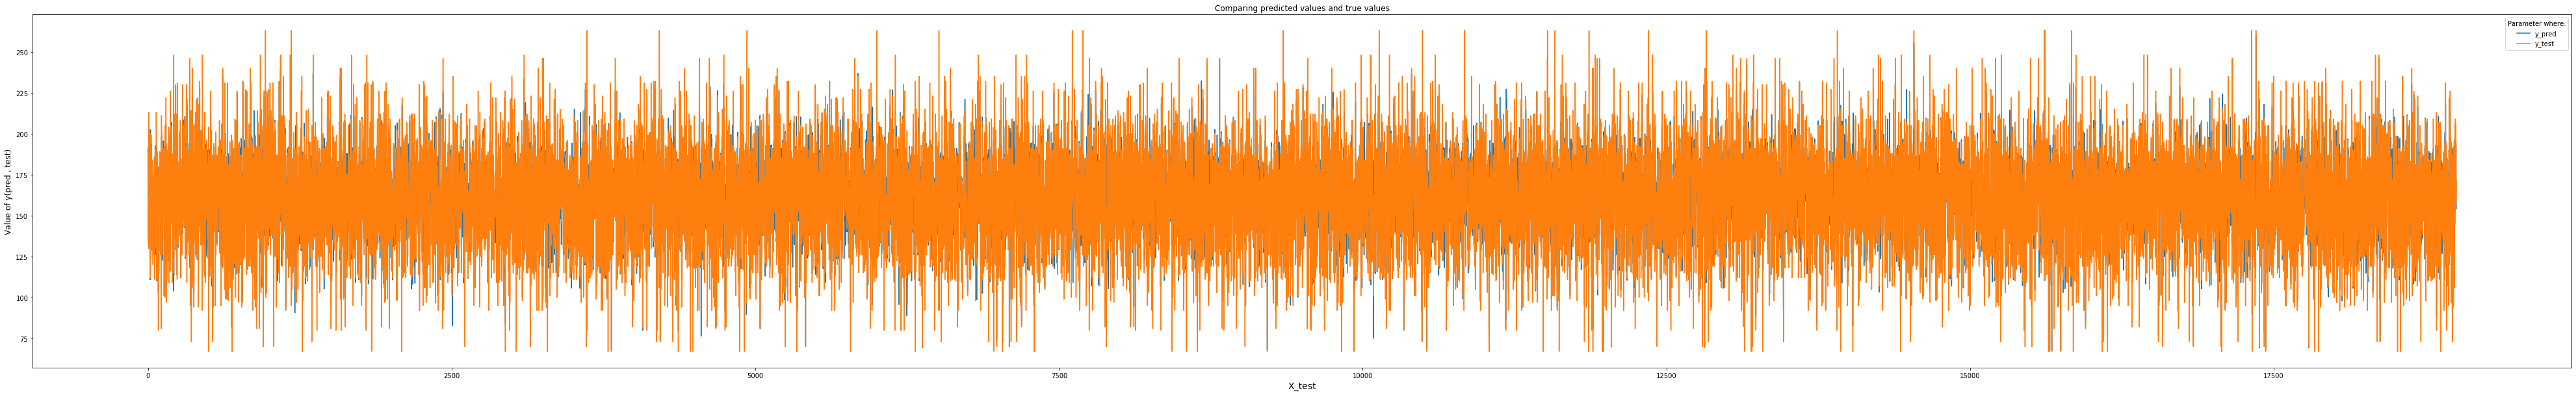

In [7]:
plt.figure(figsize=(70,10))
plt.plot(y_pred,  label='y_pred')
plt.plot(y_test, label='y_test')
plt.xlabel('X_test', fontsize=14)
plt.ylabel('Value of y(pred , test)', fontsize=12)
plt.title('Comparing predicted values and true values')
plt.legend(title='Parameter where:')
plt.show()

In [8]:
#Root Mean Square Error of data
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


16.62360205237874

In [9]:
y_test.std()

29.17870413393823